#  Wind Turbine SCADA Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from windrose import WindroseAxes
import os
print(os.listdir("D:/Python/Wind/WindTurbine_SCADA"))
%matplotlib inline

['.git', '.gitattributes', '.ipynb_checkpoints', 'Powercurve.png', 'README.md', 'T1.csv', 'WindTurbineSCADA.ipynb']


In [2]:
data = pd.read_csv("D:/Python/Wind/WindTurbine_SCADA/T1.csv")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [4]:
data_T1 = data.copy()

In [5]:
data_T1.rename(columns={"Date/Time":"Time",
                        "LV ActivePower (kW)":"ActivePower(kW)",
                        "Wind Speed (m/s)":"WindSpeed(m/s)",
                        "Wind Direction (°)":"WindDirection(°)"},
                        inplace=True)
data_T1.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),WindDirection(°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [6]:
#function for finding months
def find_month(x):
    if " 01 " in x:
        return "Jan"
    elif " 02 " in x:
        return "Feb"
    elif " 03 " in x:
        return "March"    
    elif " 04 " in x:
        return "April"    
    elif " 05 " in x:
        return "May"    
    elif " 06 " in x:
        return "June"    
    elif " 07 " in x:
        return "July"    
    elif " 08 " in x:
        return "August"    
    elif " 09 " in x:
        return "Sep"    
    elif " 10 " in x:
        return "Oct"    
    elif " 11 " in x:
        return "Nov"    
    else:
        return "Dec"  

In [7]:
#Add months
data_T1['Month'] = data_T1.Time.apply(find_month)
data_T1.Month.unique()
data_T1.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),WindDirection(°),Month
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan


In [8]:
#function for rewriting wind speed for 0.5 intervals. 
#For example: wind speeds between 3.25 and 3.75 turns 3.5,wind speeds between 3.75 and 4.25 turns 4.0
def mean_speed(x):
    list=[]
    i=0.25
    while i<=25.5:
        list.append(i)
        i+=0.5
    for i in list:
        if x < i:
            x=i-0.25
            return x

In [9]:
#adding a new column as "mean_WindSpeed" with function mean_speed().
data_T1["mean_WindSpeed"]=data_T1["WindSpeed(m/s)"].apply(mean_speed)
data_T1.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),WindDirection(°),Month,mean_WindSpeed
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5


In [10]:
#function for rewriting wind direction for 30 intervals. 
#For example: wind directions between 15 and 45 turns 30,wind speeds between 45 and 75 turns 60
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [11]:
#adding a new column as "mean_Direction" with function mean_direction().
data_T1["mean_WindDirection"]=data_T1["WindDirection(°)"].apply(mean_direction)
data_T1.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),WindDirection(°),Month,mean_WindSpeed,mean_WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270


In [12]:
#function for rewriting wind direction with letters. 
#For example: 0=N, 30=NNE 60=NEE etc.
def find_direction(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W" 
    if x==300:
        return "NWW" 
    if x==330:
        return "NNW"

In [13]:
#adding a new column as "Direction" with function find_direction().
data_T1["Direction"]=data_T1["mean_WindDirection"].apply(find_direction)
data_T1.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),WindDirection(°),Month,mean_WindSpeed,mean_WindDirection,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W


In [14]:
#Number of wind speed values between 3.5 and 25.
len(data_T1["WindSpeed(m/s)"][(data_T1["WindSpeed(m/s)"]>3.5) & (data_T1["WindSpeed(m/s)"]<25)])

40634

In [15]:
#Values bigger than 25. 
data_T1["WindSpeed(m/s)"][data_T1["WindSpeed(m/s)"]>25].value_counts()

25.206011    1
Name: WindSpeed(m/s), dtype: int64

In [16]:
#Remove the data that wind speed is smaller than 3.5 and bigger than 25.5
#We do that because according to turbine power curve turbine works between these values.
data_T1N=data_T1[(data_T1["WindSpeed(m/s)"]>3.5) & (data_T1["WindSpeed(m/s)"]<=25.5)]

In [17]:
#Number of values where wind speed is bigger than 3.5 and active power is zero. 
#If wind speed is bigger than 3.5 and active power is zero, this means turbine is out of order. we must eliminate these.
len(data_T1N["ActivePower(kW)"][(data_T1N["ActivePower(kW)"]==0)&(data_T1N["WindSpeed(m/s)"]>3.5)])

2217

In [18]:
#Eliminate datas where wind speed is bigger than 3.5 and active power is zero.
data_T1N=data_T1N[((data_T1N["ActivePower(kW)"]!=0)&(data_T1N["WindSpeed(m/s)"]>3.5)) | (data_T1N["WindSpeed(m/s)"]<=3.5)]

In [19]:
len(data_T1N["WindSpeed(m/s)"])
data_T1N.head(10)

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),WindDirection(°),Month,mean_WindSpeed,mean_WindDirection,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,Jan,5.5,270,W
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,Jan,6.0,270,W
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,Jan,5.5,270,W
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,Jan,5.5,240,SWW
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,Jan,5.5,270,W


In [20]:
#the mean value of Nordex_Powercurve(kW) when mean_WindSpeed is 5.5
data_T1N["Theoretical_Power_Curve (KWh)"][data_T1N["mean_WindSpeed"]==5.5].mean()

472.09575192642797

In [21]:
Theoretical_Power_Curve (KWh)"][data_T1N["mean_WindSpeed"]==5.5].value_counts()

SyntaxError: invalid syntax (<ipython-input-21-ae80d6e13fbc>, line 1)

In [22]:
#we create clean data and add a columns where calculating losses. 
#Loss is difference between the Nordex_Powercurve and ActivePower. 
data_T1C = data_T1N.sort_values("Time")
data_T1C["LossValue(kW)"] = data_T1C["Theoretical_Power_Curve (KWh)"]-data_T1C["ActivePower(kW)"]
data_T1C["Loss(%)"] = data_T1C["LossValue(kW)"] / data_T1C["Theoretical_Power_Curve (KWh)"]

#Round the valies to 2 digit.
data_T1C = data_T1C.round({'ActivePower(kW)': 2, 'WindSpeed(m/s)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                            'WindDirection': 2, 'LossValue(kW)': 2, 'Loss(%)': 2})
data_T1C.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),WindDirection(°),Month,mean_WindSpeed,mean_WindDirection,Direction,LossValue(kW),Loss(%)
0,01 01 2018 00:00,380.05,5.31,416.33,259.994904,Jan,5.5,270,W,36.28,0.09
1,01 01 2018 00:10,453.77,5.67,519.92,268.641113,Jan,5.5,270,W,66.15,0.13
2,01 01 2018 00:20,306.38,5.22,390.90,272.564789,Jan,5.0,270,W,84.52,0.22
3,01 01 2018 00:30,419.65,5.66,516.13,271.258087,Jan,5.5,270,W,96.48,0.19
4,01 01 2018 00:40,380.65,5.58,491.70,265.674286,Jan,5.5,270,W,111.05,0.23


In [23]:
#creating summary speed dataframe from clean data.
Group_Speed = data_T1C.groupby("mean_WindSpeed")
data_T1_speed = Group_Speed.mean()
#removing the unnecessary columns.
data_T1_speed.drop(columns={"WindSpeed(m/s)","WindDirection(°)","mean_WindDirection"},inplace=True)
#creating a windspeed column from index values.
listTspeed_WS=data_T1_speed.index.copy()
data_T1_speed["WindSpeed(m/s)"]=listTspeed_WS
#changing the place of columns.
data_T1_speed=data_T1_speed[["WindSpeed(m/s)","ActivePower(kW)","Theoretical_Power_Curve (KWh)","LossValue(kW)","Loss(%)"]]
#changing the index numbers.
data_T1_speed["Index"]=list(range(1,len(data_T1_speed.index)+1))
data_T1_speed.set_index("Index",inplace=True)
#rounding the values to 2 digit
data_T1_speed=data_T1_speed.round({"WindSpeed(m/s)": 1, 'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})
#creating a count column that shows the number of wind speed from clean data.
data_T1_speed["count"]=[len(data_T1C["mean_WindSpeed"][data_T1C["mean_WindSpeed"]==i]) 
                        for i in data_T1_speed["WindSpeed(m/s)"]]

data_T1_speed

,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),LossValue(kW),Loss(%),count
Index,,,,,,
1,3.5,51.68,68.61,16.936089,0.24,675
2,4.0,98.33,127.75,29.422771,0.23,1736
3,4.5,183.96,222.48,38.522531,0.17,1794
4,5.0,285.47,336.32,50.858557,0.15,1725
5,5.5,402.30,472.10,69.798514,0.15,2012
6,6.0,546.76,627.10,80.343759,0.13,2216
7,6.5,713.07,807.67,94.600655,0.12,2274
8,7.0,902.86,1015.80,112.938349,0.11,2320
9,7.5,1122.43,1256.94,134.511251,0.11,2254


In [24]:
#create summary direction dataframe from clean data.
Group_direction = data_T1C.groupby("Direction")
data_T1_direction=Group_direction.mean()
#remove the unnecessary columns.
data_T1_direction.drop(columns={"WindSpeed(m/s)","WindDirection(°)"},inplace=True)
#create a column from index.
listTdirection_Dir=data_T1_direction.index.copy()
data_T1_direction["Direction"]=listTdirection_Dir
#change the name of mean_WindSpeed column as  WindSpeed.
data_T1_direction["WindSpeed(m/s)"]=data_T1_direction["mean_WindSpeed"]
data_T1_direction.drop(columns={"mean_WindSpeed"},inplace=True)
#change the place of columns.
data_T1_direction=data_T1_direction[["Direction","mean_WindDirection","ActivePower(kW)","Theoretical_Power_Curve (KWh)","WindSpeed(m/s)",
                                     "LossValue(kW)","Loss(%)"]]
#change the index numbers.
data_T1_direction["Index"]=list(range(1,len(data_T1_direction.index)+1))
data_T1_direction.set_index("Index",inplace=True)
#create a count column that shows the number of directions from clean data.
data_T1_direction["count"]=[len(data_T1C["Direction"][data_T1C["Direction"]==i]) 
                        for i in data_T1_direction["Direction"]]
#round the values to 2 digit
data_T1_direction=data_T1_direction.round({'WindSpeed(m/s)': 1,'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                                           'LossValue(kW)': 2, 'Loss(%)': 2})
#sort by mean_Direction
data_T1_direction=data_T1_direction.sort_values("mean_WindDirection")
data_T1_direction.drop(columns={"mean_WindDirection"},inplace=True)

data_T1_direction

,Direction,ActivePower(kW),Theoretical_Power_Curve (KWh),WindSpeed(m/s),LossValue(kW),Loss(%),count
Index,,,,,,,
2,N,1171.54,1383.10,7.4,211.56,0.18,1294
4,NNE,1511.73,1739.18,8.4,227.45,0.14,7533
3,NEE,1773.33,1969.08,8.8,195.75,0.13,13042
1,E,1209.27,1345.86,7.4,136.59,0.04,2088
8,SEE,579.82,631.63,5.6,51.80,0.08,485
9,SSE,912.14,1047.23,6.7,135.09,0.16,511
7,S,2409.73,2517.83,11.7,108.10,0.07,3710
10,SSW,2300.71,2439.50,10.9,138.79,0.08,6119
11,SWW,1252.60,1359.33,7.4,106.73,0.12,1663


# Data Visualization

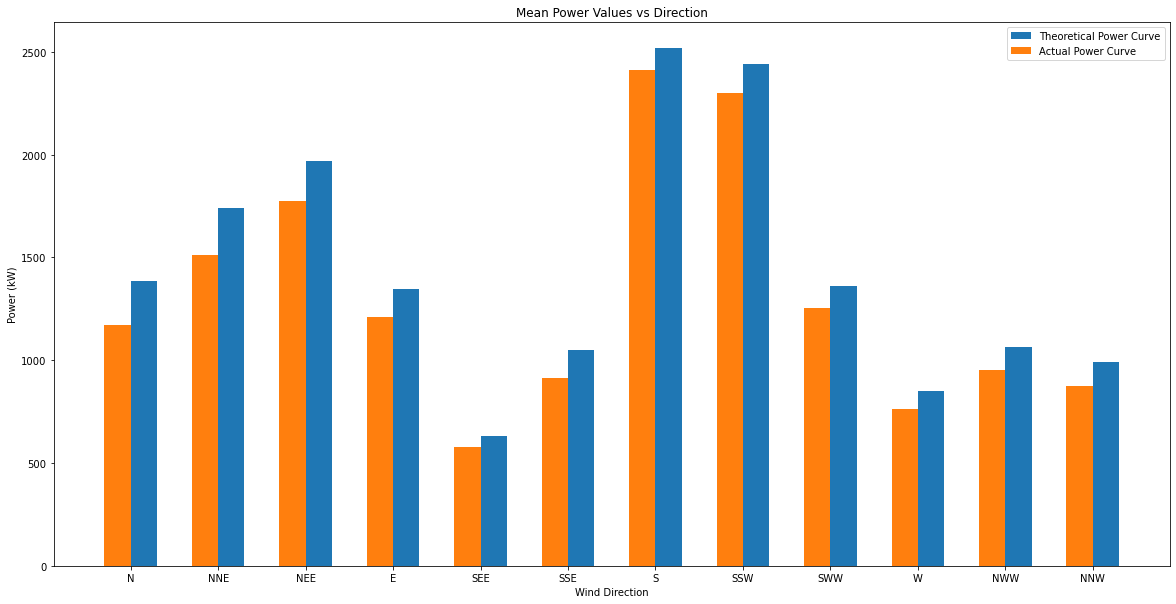

In [25]:
#Drawing graph of mean powers according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T1_direction["Direction"],data_T1_direction["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",align="edge",width=0.3)
    plt.bar(data_T1_direction["Direction"],data_T1_direction["ActivePower(kW)"],label="Actual Power Curve",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Power (kW)")
    plt.title("Mean Power Values vs Direction")
    plt.legend()
    plt.show()
bar_graph()

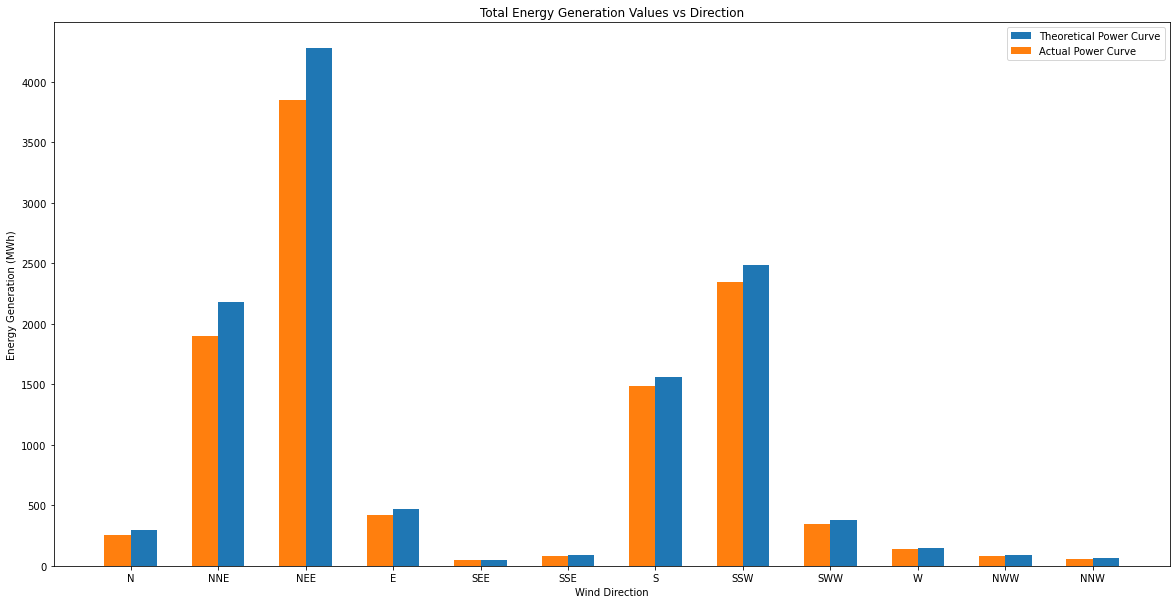

In [26]:
#creating summary direction total dataframe from direction data.
data_T1_direction_total=data_T1_direction.copy()
#removing the unnecessary columns.
data_T1_direction_total.drop(columns={"count","ActivePower(kW)","Theoretical_Power_Curve (KWh)","LossValue(kW)","Loss(%)"},inplace=True)
#calculating the total values from direction data.
data_T1_direction_total["Total_Generation(MWh)"]=data_T1_direction["ActivePower(kW)"]*data_T1_direction["count"]/6000
data_T1_direction_total["Theoretical_PC_Total_Generation(MWh)"]=data_T1_direction["Theoretical_Power_Curve (KWh)"]*data_T1_direction["count"]/6000
data_T1_direction_total["Total_Loss(MWh)"]=data_T1_direction_total["Theoretical_PC_Total_Generation(MWh)"]-data_T1_direction_total["Total_Generation(MWh)"]
data_T1_direction_total["Loss(%)"]=data_T1_direction_total["Total_Loss(MWh)"]/data_T1_direction_total["Theoretical_PC_Total_Generation(MWh)"]*100
#rounding the values to 2 digit
data_T1_direction_total=data_T1_direction_total.round({'WindSpeed(m/s)': 1,'Total_Generation(MWh)': 2, 'Theoretical_PC_Total_Generation(MWh)': 2,
                                           'Total_Loss(MWh)': 2, 'Loss(%)': 2})
#changing the place of columns.
data_T1_direction_total=data_T1_direction_total[["Direction","Total_Generation(MWh)","Theoretical_PC_Total_Generation(MWh)","WindSpeed(m/s)",
                                     "Total_Loss(MWh)","Loss(%)"]]

data_T1_direction_total

#Drawing graph of total generations according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T1_direction_total["Direction"],data_T1_direction_total["Theoretical_PC_Total_Generation(MWh)"],label="Theoretical Power Curve",align="edge",width=0.3)
    plt.bar(data_T1_direction_total["Direction"],data_T1_direction_total["Total_Generation(MWh)"],label="Actual Power Curve",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Energy Generation (MWh)")
    plt.title("Total Energy Generation Values vs Direction")
    plt.legend()
    plt.show()
bar_graph()

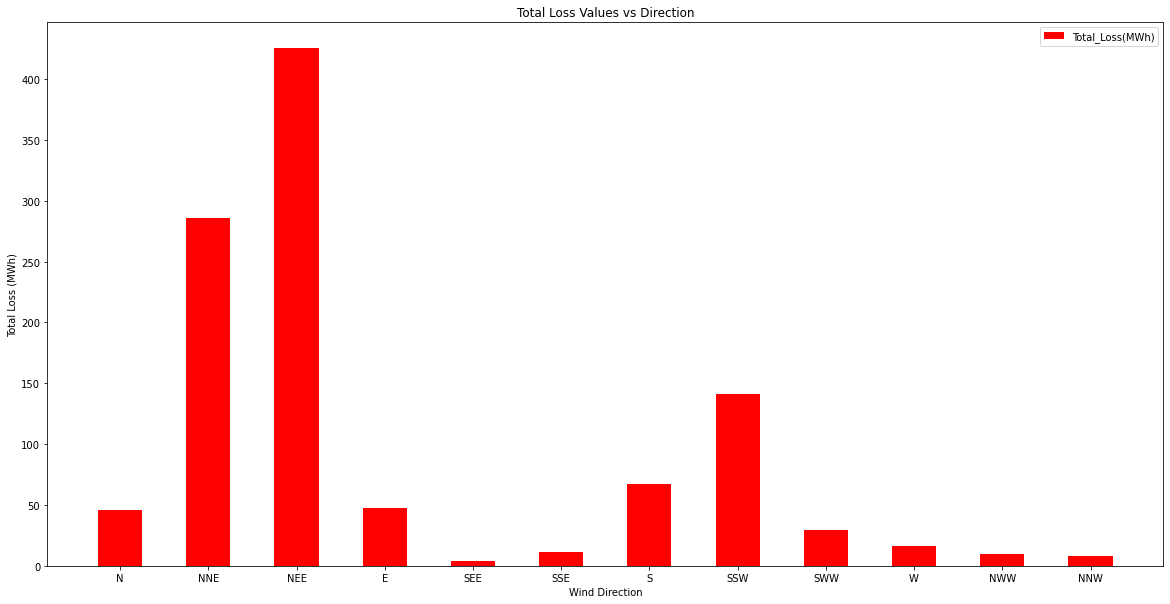

In [27]:
#Drawing graph of total loss according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T1_direction_total["Direction"],data_T1_direction_total["Total_Loss(MWh)"],
            label="Total_Loss(MWh)",align="center",width=0.5, color="red",picker=5)
    plt.xlabel("Wind Direction")
    plt.ylabel("Total Loss (MWh)")
    plt.title("Total Loss Values vs Direction")
    plt.legend()
    plt.show()
bar_graph()

In [28]:
#creating summary dataframes for all directions from clean data in a for loop as we did when creating direction dataframe.
list_data=[]
list_yon=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]
for i in range(0,12):
    dataT1_A=data_T1C[data_T1C["Direction"]==list_yon[i]]
    #
    Group_A = dataT1_A.groupby("mean_WindSpeed")
    data_T1_A=Group_A.mean()
    #
    data_T1_A.drop(columns={"WindSpeed(m/s)","WindDirection(°)","mean_WindDirection"},inplace=True)
    #
    listTA_WS=data_T1_A.index.copy()
    data_T1_A["WindSpeed(m/s)"]=listTA_WS
    #
    data_T1_A=data_T1_A[["WindSpeed(m/s)","ActivePower(kW)","Theoretical_Power_Curve (KWh)","LossValue(kW)","Loss(%)"]]
    #
    data_T1_A["Index"]=list(range(1,len(data_T1_A.index)+1))
    data_T1_A.set_index("Index",inplace=True)
    #
    data_T1_A=data_T1_A.round({'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2, 'LossValue(kW)': 2, 'Loss(%)': 2})
    #
    data_T1_A["count"]=[len(dataT1_A["mean_WindSpeed"][dataT1_A["mean_WindSpeed"]==x]) 
                            for x in data_T1_A["WindSpeed(m/s)"]]
    list_data.append(data_T1_A)
    
data_T1_N=list_data[0]
data_T1_NNE=list_data[1]
data_T1_NEE=list_data[2]
data_T1_E=list_data[3]
data_T1_SEE=list_data[4]
data_T1_SSE=list_data[5]
data_T1_S=list_data[6]
data_T1_SSW=list_data[7]
data_T1_SWW=list_data[8]
data_T1_W=list_data[9]
data_T1_NWW=list_data[10]
data_T1_NNW=list_data[11]

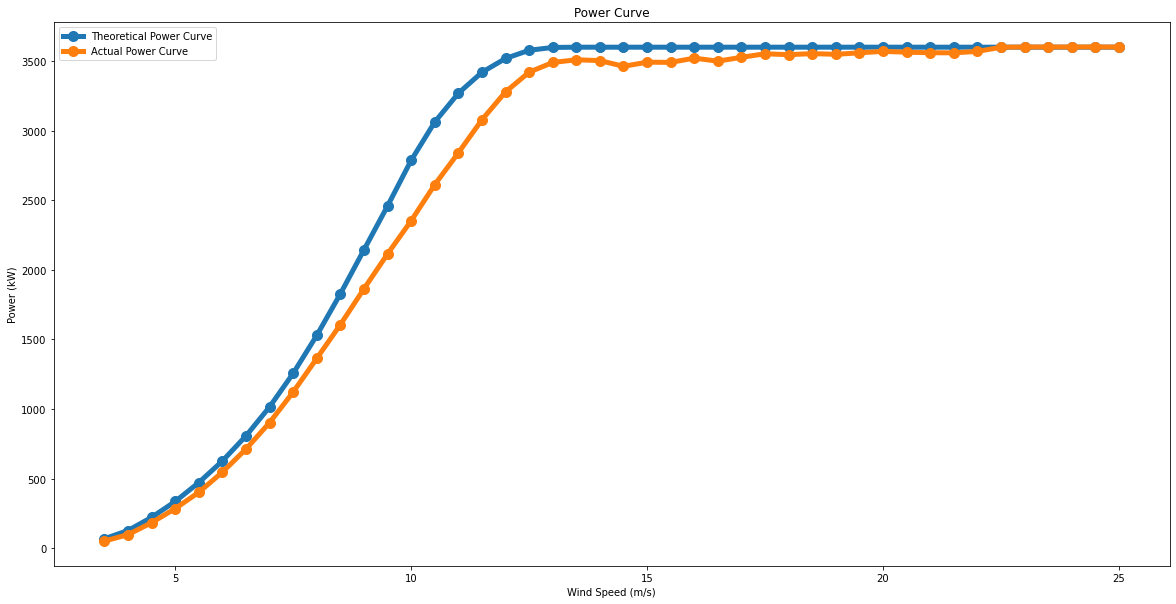

In [29]:
#Drawing power curve of the turbine.
def graph_WT():
    fig = plt.figure(figsize=(20,10))
    plt.plot(data_T1_speed["WindSpeed(m/s)"],data_T1_speed["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(data_T1_speed["WindSpeed(m/s)"],data_T1_speed["ActivePower(kW)"],label="Actual Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Power Curve")
    plt.legend()
    plt.show()
    fig.savefig("Powercurve.png")
    plt.close(fig)
        
graph_WT()

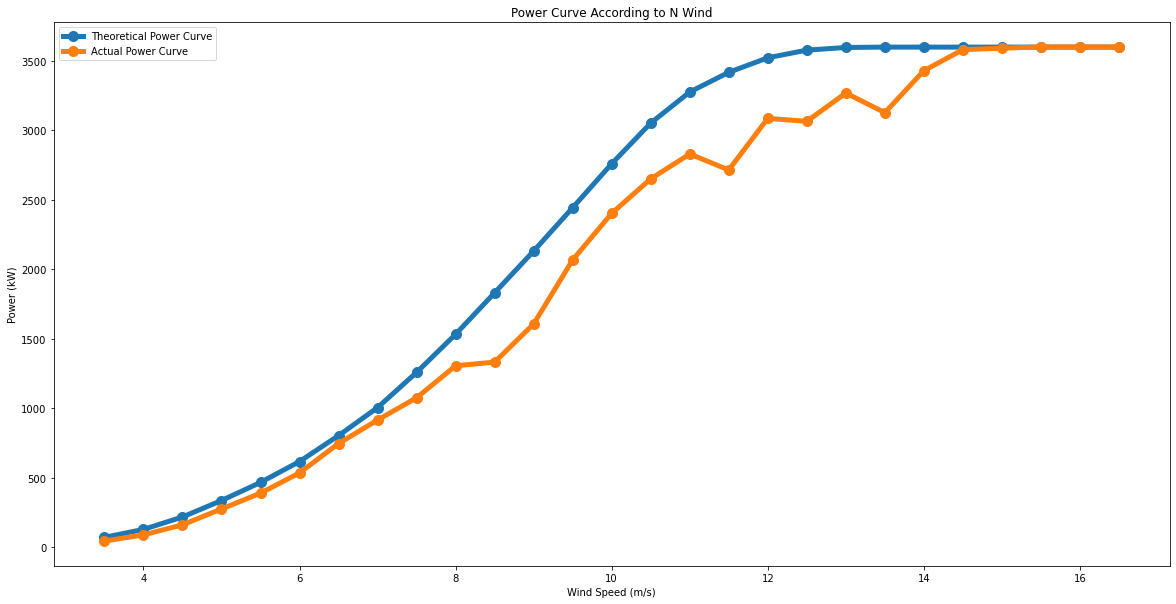

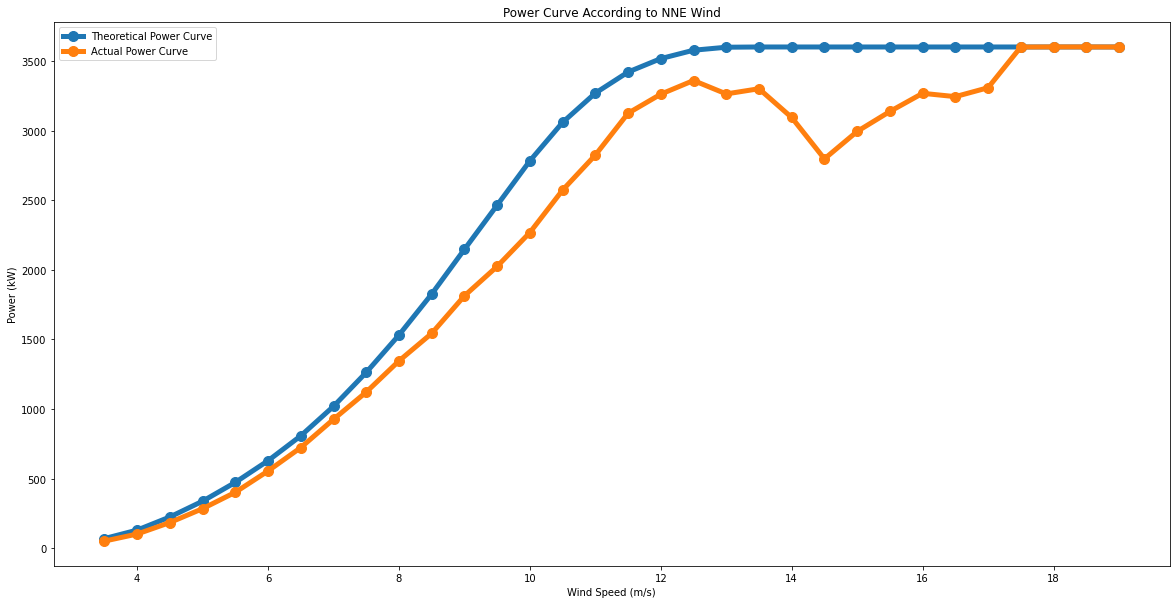

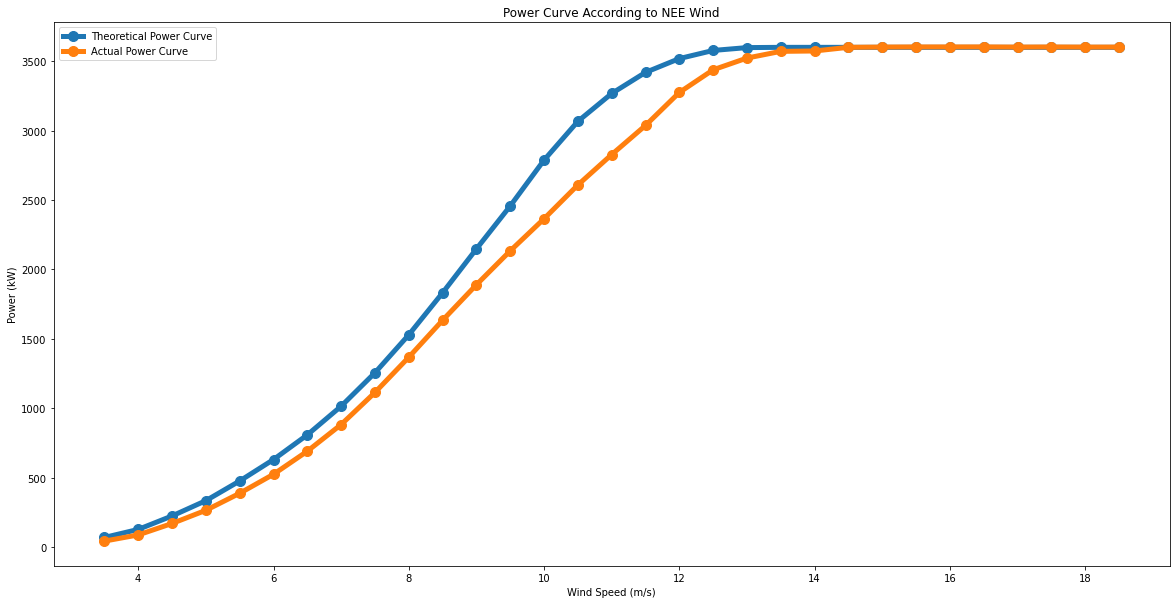

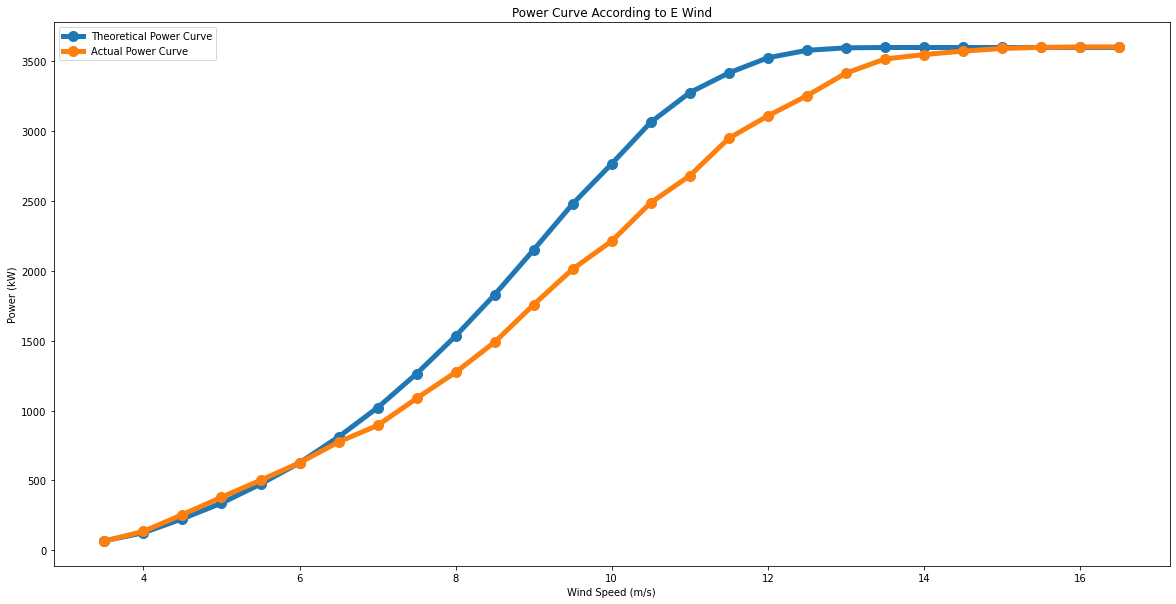

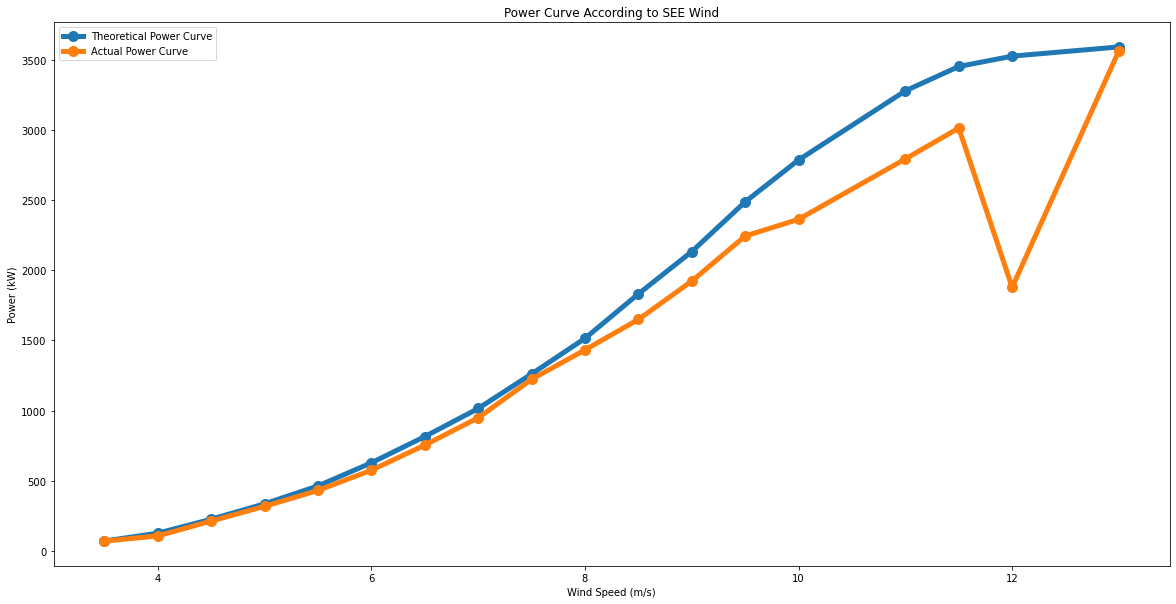

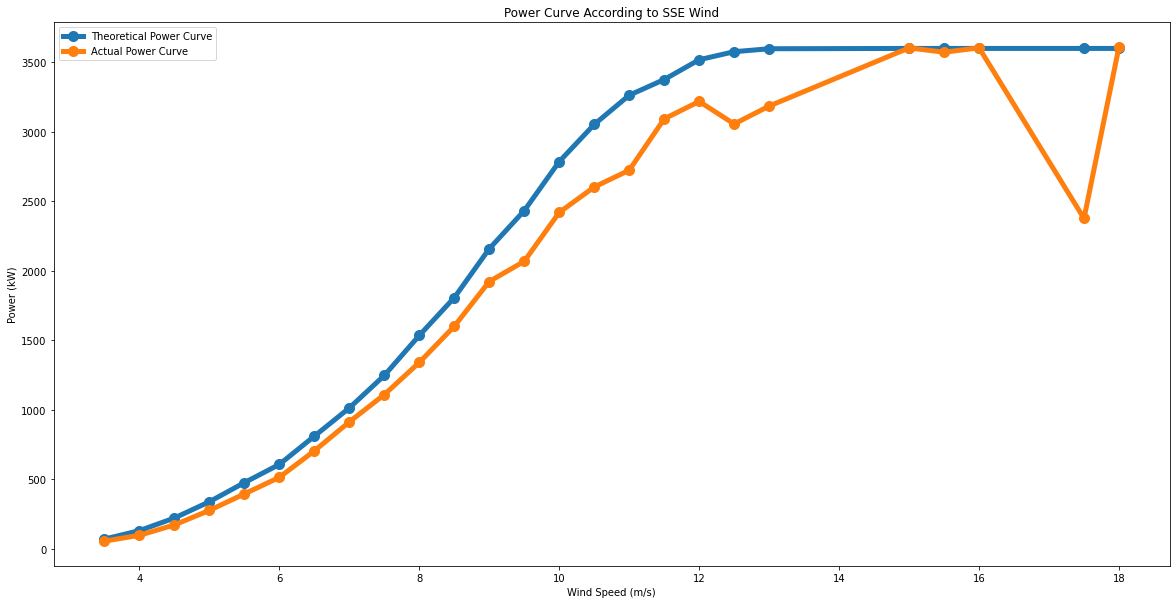

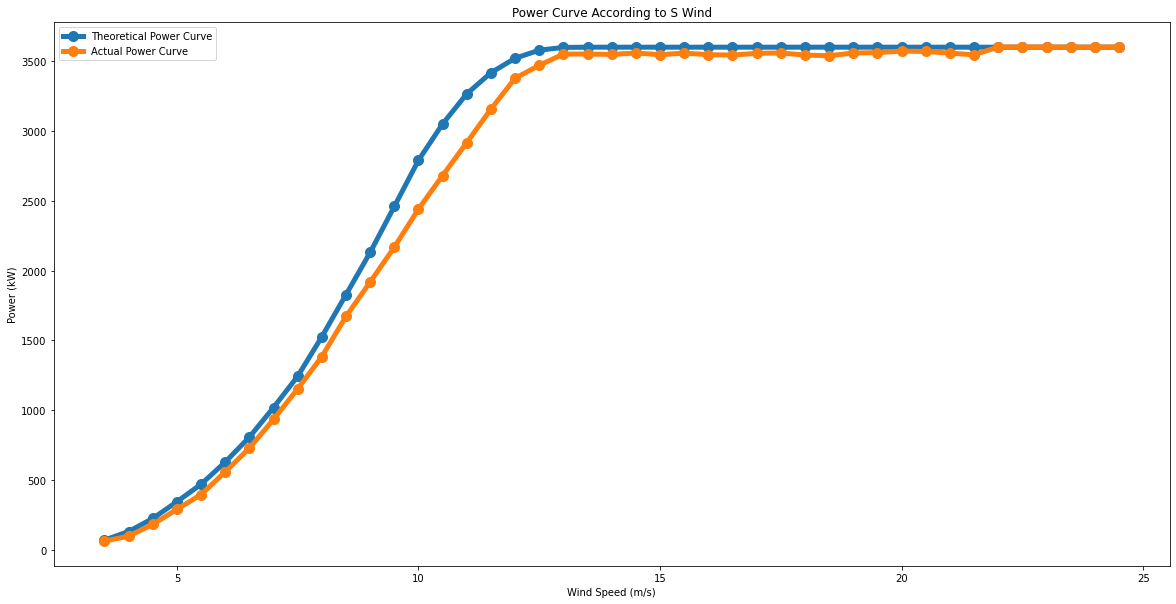

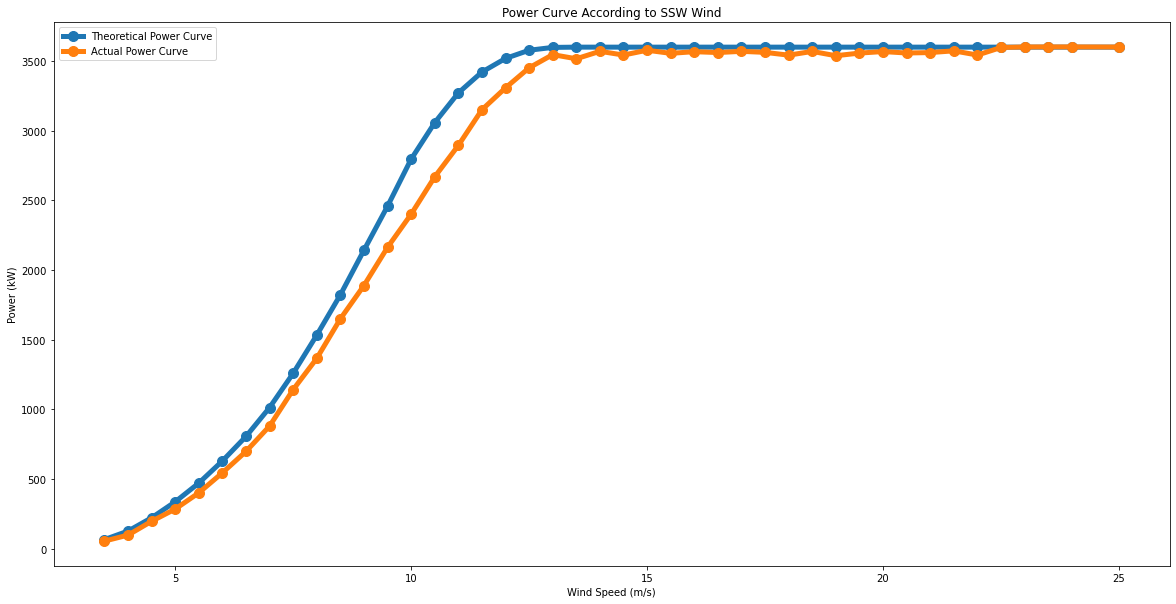

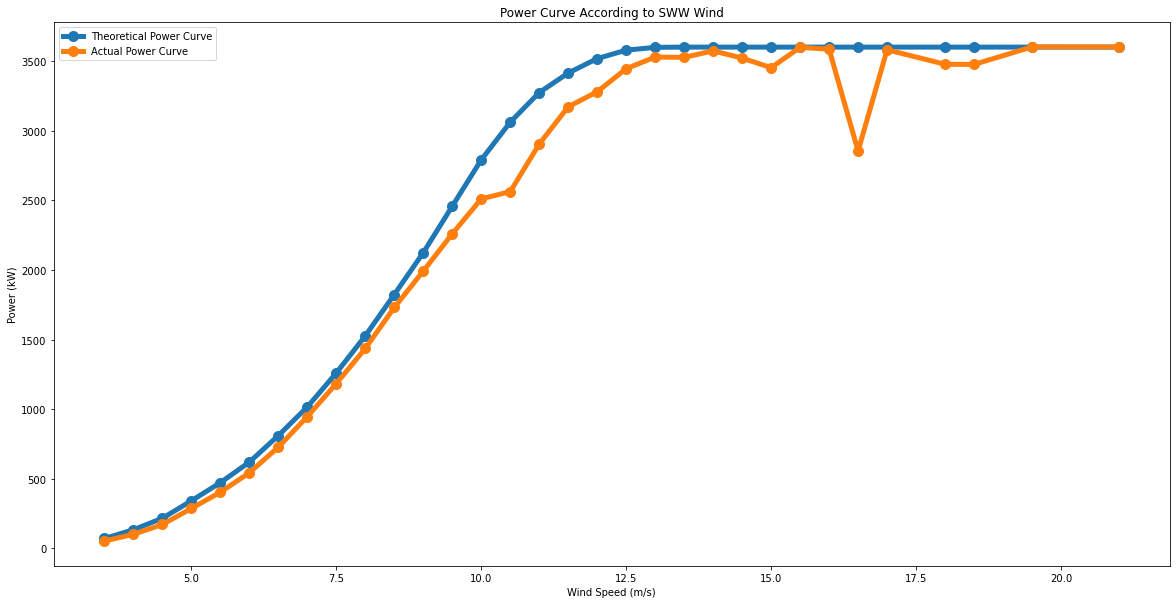

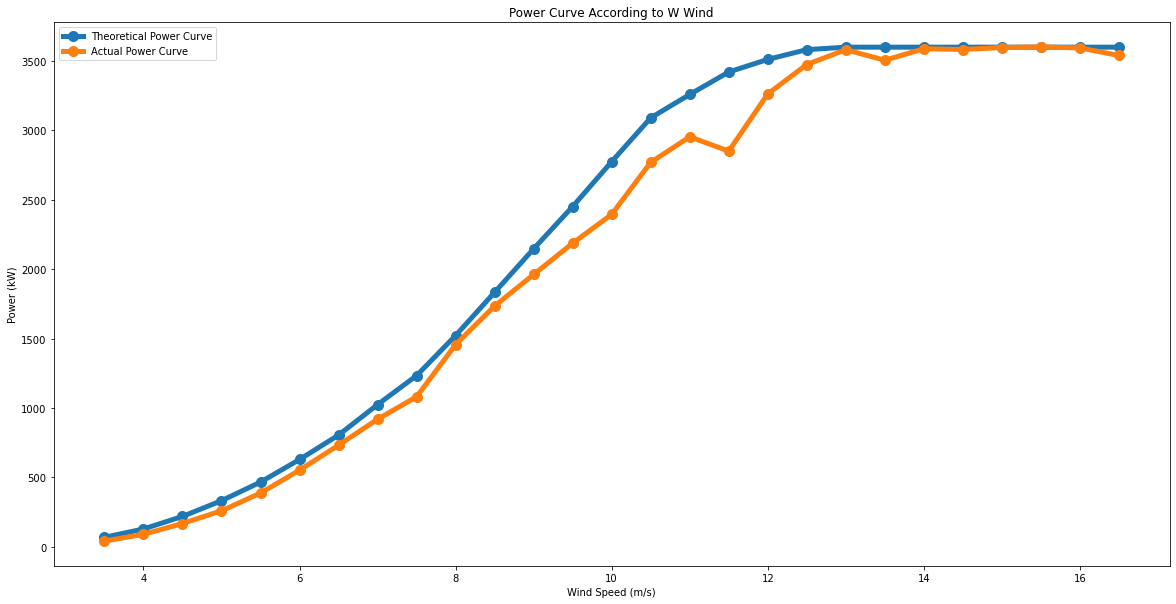

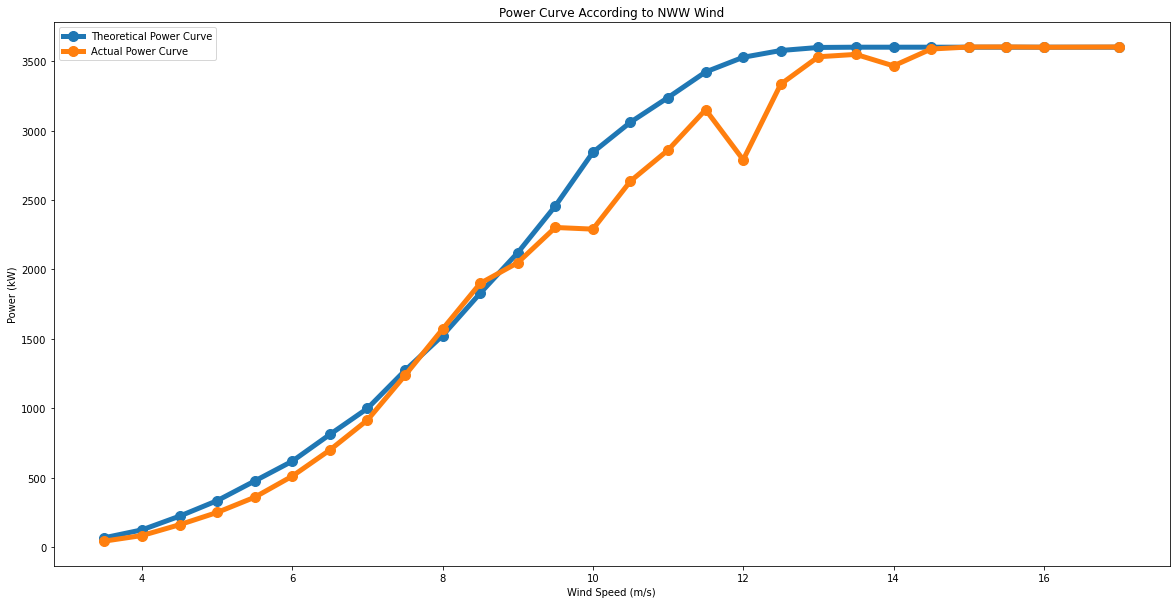

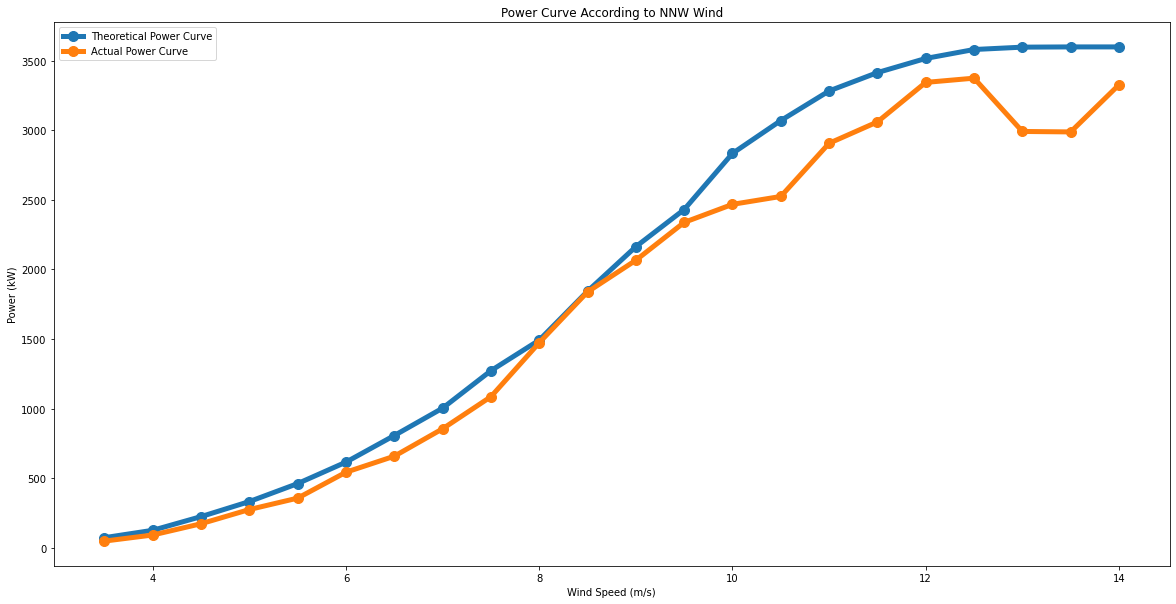

In [30]:
#Drawing power curve of the turbine for all directions.
list_table=[data_T1_N,data_T1_NNE,data_T1_NEE,data_T1_E,data_T1_SEE,data_T1_SSE,data_T1_S,
            data_T1_SSW,data_T1_SWW,data_T1_W,data_T1_NWW,data_T1_NNW]

list_tableName=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

def graph_T(i):
    fig = plt.figure(figsize=(20,10))  
    plt.plot(list_table[i]["WindSpeed(m/s)"],list_table[i]["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(list_table[i]["WindSpeed(m/s)"],list_table[i]["ActivePower(kW)"],label="Actual Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Power Curve According to {} Wind".format(list_tableName[i]))
    plt.legend()
    plt.show()

for i in range(0,12):
    graph_T(i)

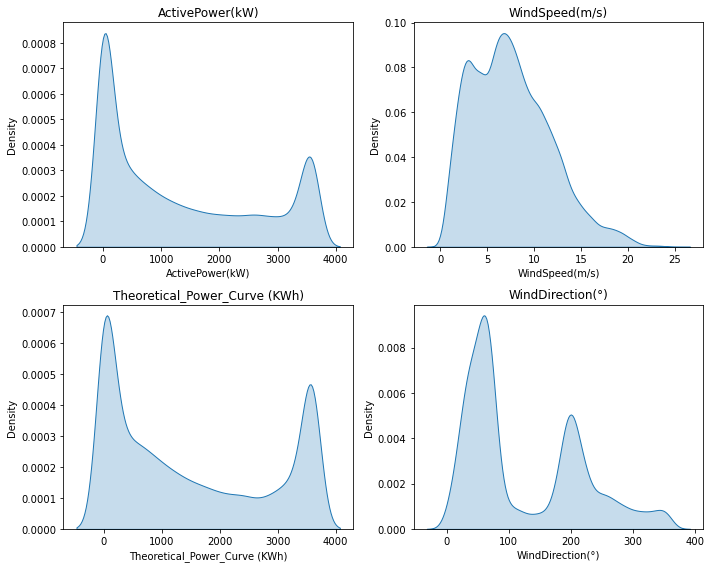

In [31]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data_T1.iloc[:,i+1], shade=True)
    plt.title(data_T1.columns[i+1])
plt.tight_layout()
plt.show()

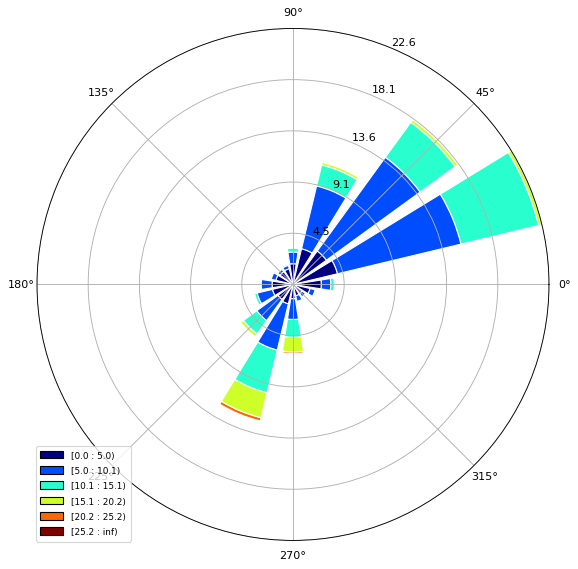

In [32]:
ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()